In [1]:
import os
import time

import pandas as pd
from featuretools.autonormalize import autonormalize as an

In [43]:
df = pd.read_csv(os.path.join(os.path.abspath(os.path.join('tt1.csv'))))
#df=pd.read_csv(os.path.join(os.path.abspath(os.path.join('t.csv'))), encoding='utf-8-sig', sep='\s*,\s*', engine='python')
#df.drop('Place',axis=1,inplace=True)
df = df.drop(columns=df.columns[12:])
#df = df.drop(range(15, 12))
df = df.dropna()
df = df.drop_duplicates()
df.columns = df.columns.str.strip()
print("Rows: "+ str(df.shape[0]))
print("Columns: " + str(df.shape[1]))
df.head(3)

Rows: 44
Columns: 12


,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start
12,13,12,Universal American,NY,"Democracy Data & Communications, LLC (",83000,11/12/2009,Other,Paper,2014-01-23,In its breach report and during the course of ...,2009-11-12
20,21,20,BlueCross BlueShield Association,DC,Service Benefits Plan Administrative Services ...,3400,10/26/2009,Theft,Paper,2014-06-30,The covered entity's (CE) business associate (...,2009-10-26
21,22,21,BlueCross BlueShield Association,DC,Merkle Direct Marketing,15000,10/7/2009,Theft,Paper,2014-04-24,The covered entity's (CE) business associate (...,2009-10-07


In [44]:
df.dtypes



Unnamed: 0                           int64
Number                               int64
Name_of_Covered_Entity              object
State                               object
Business_Associate_Involved         object
Individuals_Affected                 int64
Date_of_Breach                      object
Type_of_Breach                      object
Location_of_Breached_Information    object
Date_Posted_or_Updated              object
Summary                             object
breach_start                        object
dtype: object

In [45]:
df = df.astype({ "Number": 'int64',"State":'object'})

In [46]:
start = time.time()
entityset = an.auto_entityset(df, accuracy=0.96, name='na')
time.time() - start

100%|██████████| 9/9 [00:03<00:00,  2.46it/s]


6.364660739898682

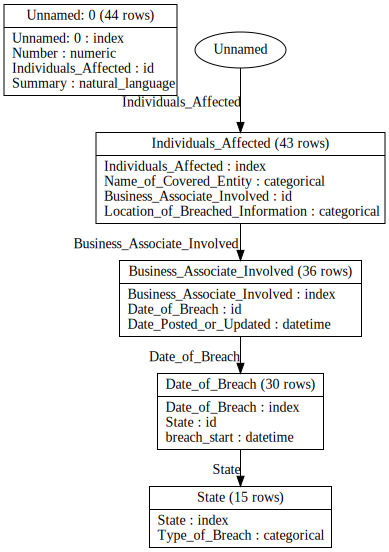

In [47]:
entityset.plot()

Above you can see plotted the entities within entityset, and the relationships between them. Each entity contains the data from the original df with duplication removed. 

In [48]:
entityset

Entityset: na
  Entities:
    Unnamed: 0 [Rows: 44, Columns: 4]
    Individuals_Affected [Rows: 43, Columns: 4]
    Business_Associate_Involved [Rows: 36, Columns: 3]
    Date_of_Breach [Rows: 30, Columns: 3]
    State [Rows: 15, Columns: 2]
  Relationships:
    Unnamed: 0.Individuals_Affected -> Individuals_Affected.Individuals_Affected
    Individuals_Affected.Business_Associate_Involved -> Business_Associate_Involved.Business_Associate_Involved
    Business_Associate_Involved.Date_of_Breach -> Date_of_Breach.Date_of_Breach
    Date_of_Breach.State -> State.State